In [65]:
from tensorflow.keras.layers import Dense,Flatten,Activation,MaxPooling2D,Conv2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.keras
import numpy as np
import cv2
import os

In [66]:
model=Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    #keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    #keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    #keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    #keras.layers.Dense(4096, activation='relu'),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.4),
    Dense(4, kernel_regularizer=keras.regularizers.l2(0.01),activation='softmax')
])

In [67]:
train=ImageDataGenerator(rotation_range=60,
                         shear_range=0.6,
                         horizontal_flip=True,
                         brightness_range=[0.4,1.2],
                         width_shift_range=0.3,
                         height_shift_range=0.3,
                         fill_mode='nearest',
                        rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)

In [68]:
training_dataset=train.flow_from_directory('base_data/Training/',
                                          target_size=(227,227),
                                          batch_size=20,
                                          class_mode='categorical')
validation_dataset=valid.flow_from_directory('base_data/Validation/',
                                            target_size=(227,227),
                                            batch_size=20,
                                            class_mode='categorical')

Found 834 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [69]:
model.compile(loss='categorical_crossentropy',
             optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.001),
             metrics='accuracy')

In [70]:
history=model.fit(training_dataset,
                 steps_per_epoch=5,
                 epochs=10,
                 validation_data=validation_dataset)

Epoch 1/10
5/5 [==============================] - 22s 2s/step - loss: 507.2412 - accuracy: 0.2200 - val_loss: 20.1977 - val_accuracy: 0.2812
Epoch 2/10
5/5 [==============================] - 10s 2s/step - loss: 66.9212 - accuracy: 0.3600 - val_loss: 10.4784 - val_accuracy: 0.2500
Epoch 3/10
5/5 [==============================] - 10s 2s/step - loss: 18.5469 - accuracy: 0.3511 - val_loss: 4.2948 - val_accuracy: 0.2500
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 12.0426 - accuracy: 0.3700 - val_loss: 1.6584 - val_accuracy: 0.2500
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 8.8971 - accuracy: 0.4100 - val_loss: 5.6037 - val_accuracy: 0.2500
Epoch 6/10
5/5 [==============================] - 10s 2s/step - loss: 19.3274 - accuracy: 0.3400 - val_loss: 1.9943 - val_accuracy: 0.2500
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 11.0706 - accuracy: 0.3700 - val_loss: 1.5840 - val_accuracy: 0.2812
Epoch 8/10
5/5 [=========

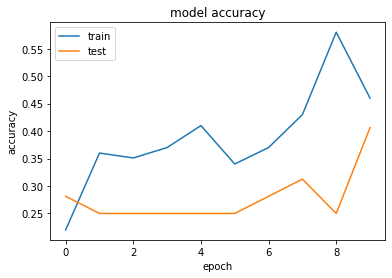

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

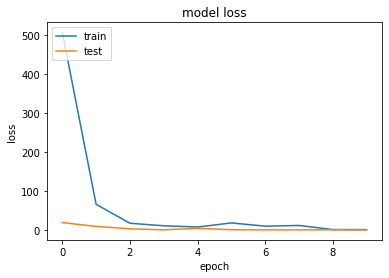

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

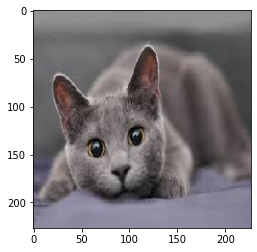

Panda


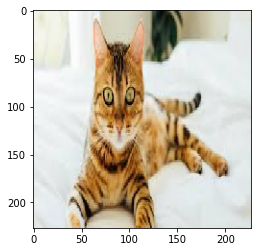

Dog


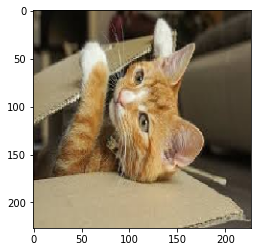

Dog


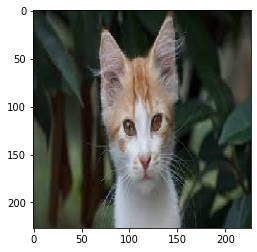

Panda


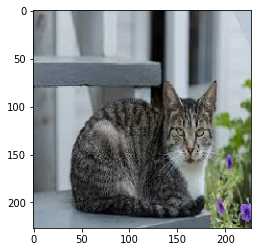

Panda


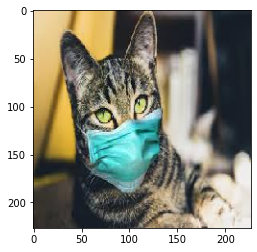

Panda


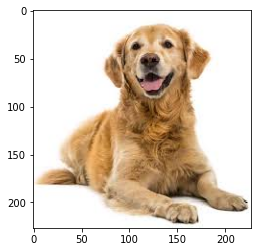

Dog


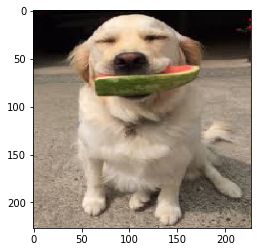

Panda


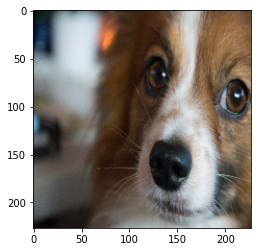

Panda


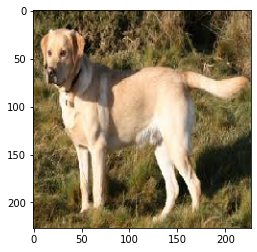

Panda


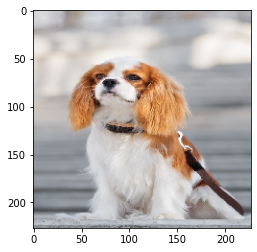

Dog


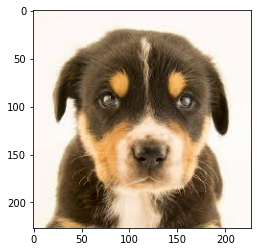

Dog


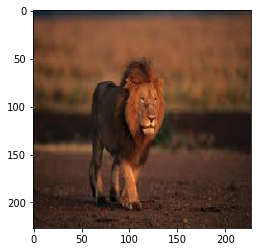

Panda


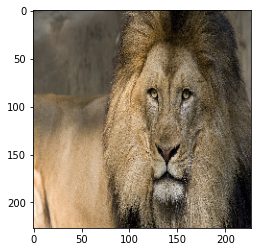

Dog


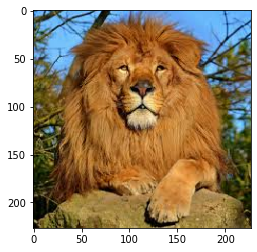

Panda


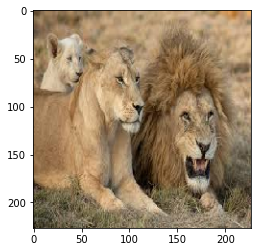

Dog


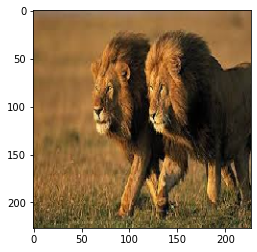

Panda


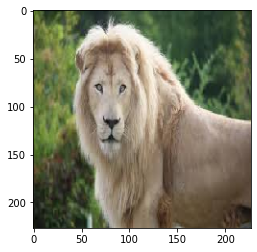

Dog


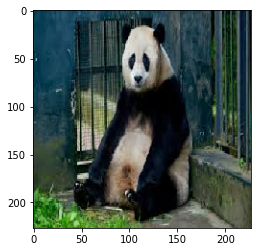

Panda


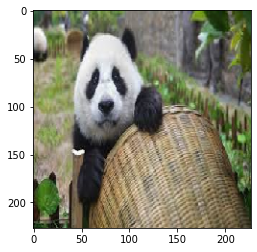

Dog


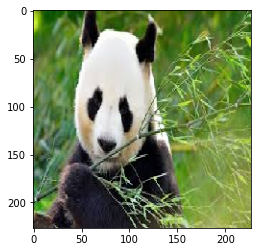

Panda


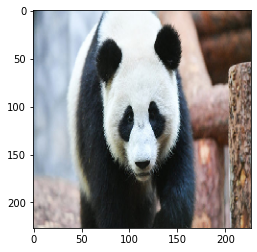

Panda


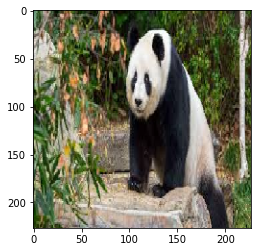

Panda


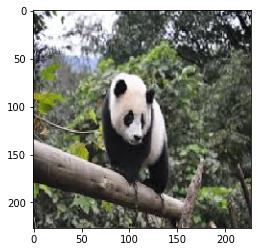

Panda


In [73]:
dir_path='base_data/Testing'
for i in os.listdir(dir_path):
    for j in range(1,7):
        img=image.load_img(dir_path+'/'+i+'/'+'img'+str(j)+'.jpg',target_size=(227,227))
        plt.imshow(img)
        plt.show()
        
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        images=np.vstack([x])
        c=model.predict(images)
        if c[0][0]==1:
            print("Cat")
        elif c[0][1]==1:
            print('Dog')
        elif c[0][2]==1:
            print("Lion")
        else:
            print('Panda')